In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#For Eliminate All Error:
import warnings
warnings.simplefilter('ignore')

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/pratyusa98/Supervised-ML/master/Regression/Student_Mark_Study_Hour/student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
df.shape

(200, 2)

In [4]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


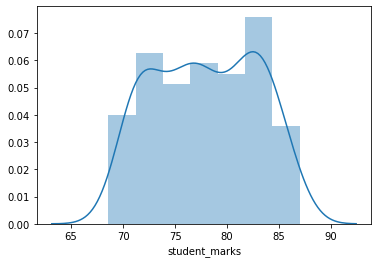

In [5]:
sns.distplot(df['student_marks'])

In [6]:
from scipy.stats import skew
print(skew(df['student_marks']))

-0.016797356319964114


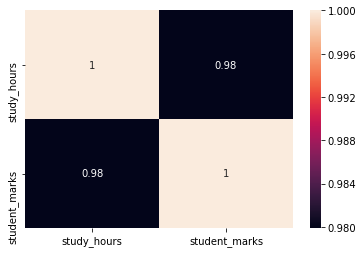

In [7]:
sns.heatmap(df.corr(),annot=True)

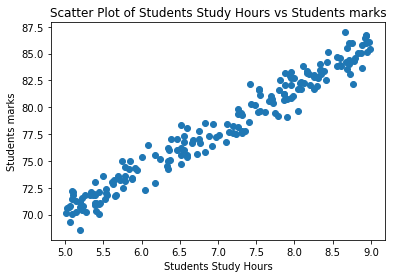

In [8]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df2 = df.fillna(df.mean())

In [11]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
X = df2.drop("student_marks", axis = 1)
y = df2.drop("study_hours", axis = 1)
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


In [14]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [15]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#Predicting the Test set results
y_pred_lr = lr.predict(X_train)
score = r2_score(y_train,y_pred_lr)
print("Score of Training:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_lr)))


y_test_pred_lr = lr.predict(X_test)
#r2 Score
score = r2_score(y_test,y_test_pred_lr)
print("Score of Testing:",100*score)
#RMSE
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_lr)))
#MAE
print("Mean Absolute Error",mean_absolute_error(y_test,y_test_pred_lr))

Score of Training: 95.89875741425085
RMSE : 1.0004327761861656
Score of Testing: 95.14124242154463
RMSE :  1.0526176617137153
Mean Absolute Error 0.8780690208883186


In [23]:
usr_inp = int(input("Enter Study Hour: "))
output = lr.predict([[usr_inp]])
output[0][0].round(2)

Enter Study Hour: 5


70.13

In [22]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']